# Import libreary 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from lime.lime_tabular import LimeTabularExplainer
import shap
shap.initjs()

# Import Data

In [2]:
data = pd.read_csv("./archive/data.csv")
print(len(data))
data.head()

569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Preprossing Data

In [3]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
data.drop(columns=['id', 'Unnamed: 32'], axis=1, inplace=True)
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [6]:
le = LabelEncoder()
data['Diagnosis'] = le.fit_transform(data.diagnosis)
data.drop('diagnosis', axis=1, inplace=True)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [7]:
x = data.drop("Diagnosis", axis=1)
y = data[["Diagnosis"]]
print(y.shape)
print(x.shape)

(569, 1)
(569, 30)


In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)
x = pd.DataFrame(scaled_data, columns=x.columns)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


# Split into training and testing sets

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [10]:
print(x_train.shape)
print(x_test.shape)

(398, 30)
(171, 30)


# XGBoost model

In [11]:
model1=xgb.XGBClassifier(n_estimator=5)
scores = cross_val_score(model1, x_train, y_train, cv=10)


/home/abdur-rahman-saad/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:20:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/home/abdur-rahman-saad/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:20:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/home/abdur-rahman-saad/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:20:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/home/abdur-rahman-saad/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:20:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/home/abdur-rahman-saad/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: 

In [12]:
np.round(scores,2)

array([0.95, 1.  , 0.95, 1.  , 0.98, 1.  , 1.  , 0.95, 0.95, 0.92])

In [13]:
scores.mean()

0.9696794871794872

In [14]:
model1.fit(x_train, y_train)

/home/abdur-rahman-saad/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:20:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [15]:
model1.score(x_test, y_test)

0.9707602339181286

# Evaluation Metrics

In [17]:
y_pred = model1.predict(x_test)

In [18]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [20]:
print(precision)
print(recall)

0.953125
0.9682539682539683


In [21]:
f1 = f1_score(y_test, y_pred)
f1

0.9606299212598425

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[105,   3],
       [  2,  61]])

In [24]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9707602339181286

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Standard SHAP values

In [17]:
explainer = shap.Explainer(model1)
shap_values = explainer(x_train)

In [18]:
np.shape(shap_values.values)

(398, 30)

# Waterfall plot

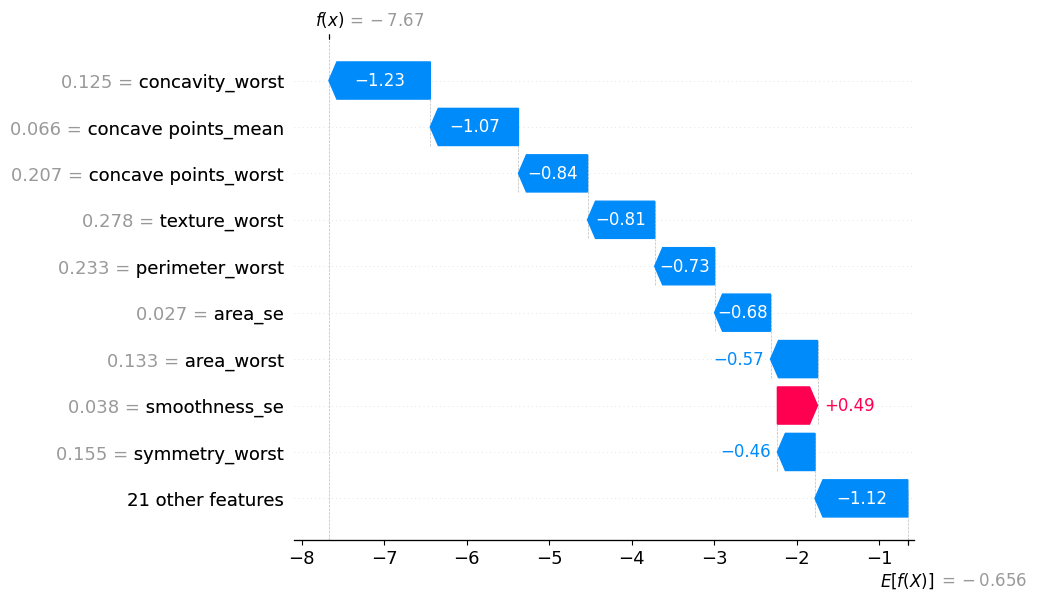

In [19]:
shap.plots.waterfall(shap_values[0])

# Force plot

In [20]:
shap.plots.force(shap_values[0])

# Stacked force plot

In [21]:
shap.plots.force(shap_values[0:100])

# Absolute mean shap

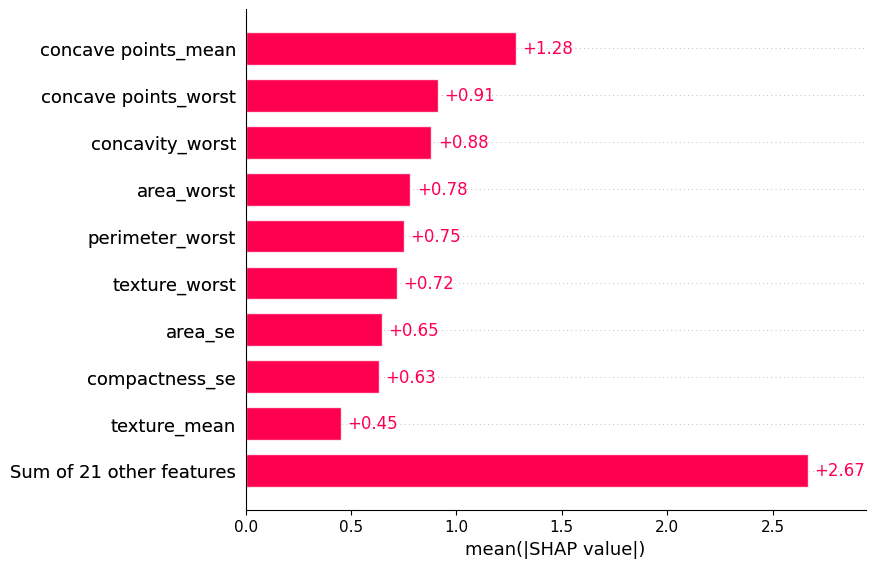

In [22]:
shap.plots.bar(shap_values)

# Beeswarm plot

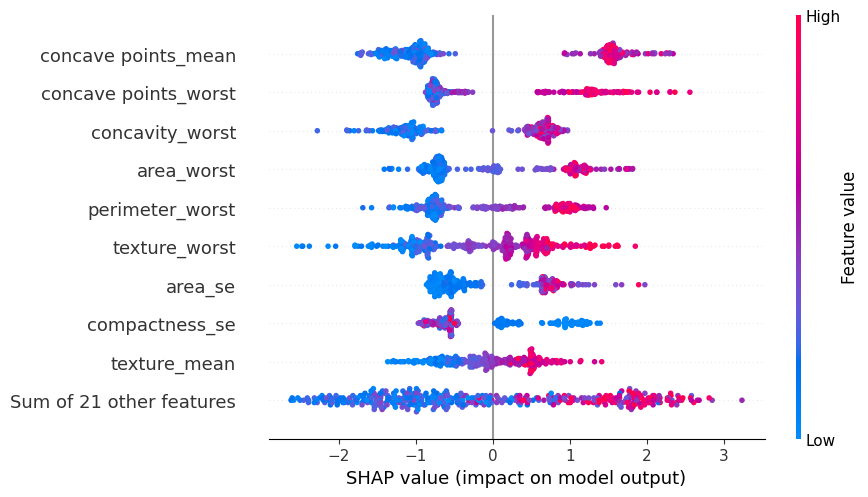

In [23]:
shap.plots.beeswarm(shap_values)

# Dependence plots

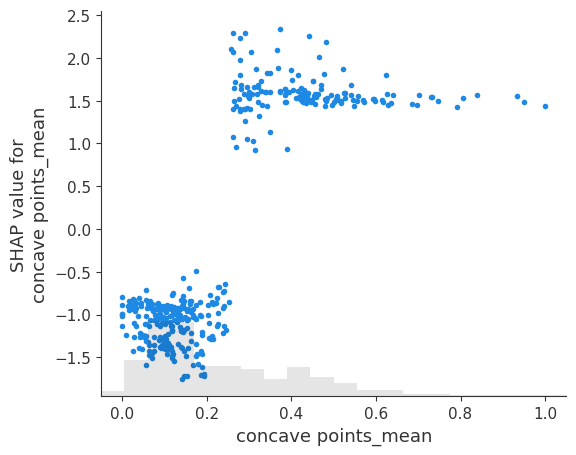

In [24]:
shap.plots.scatter(shap_values[:, "concave points_mean"])

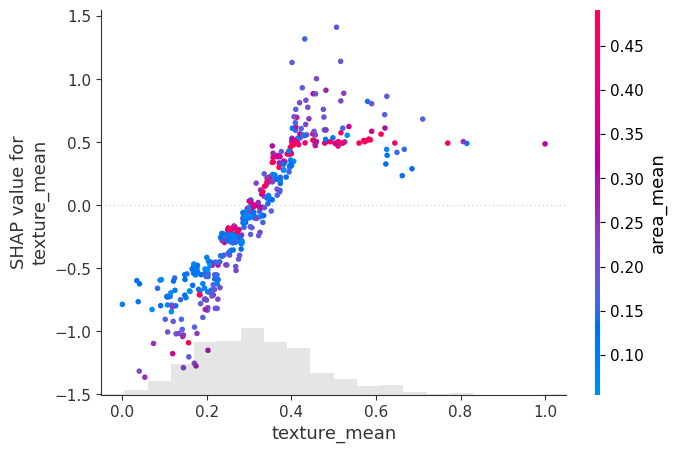

In [54]:
shap.plots.scatter(shap_values[:, "texture_mean"],
                  color=shap_values[:, "area_mean"])

# LIME

In [26]:
explainer = LimeTabularExplainer(
    training_data=x_train.values,
    feature_names=x_train.columns.tolist(),
    class_names=y_train.columns.tolist(),
    mode='classification'
)

In [27]:
exp = explainer.explain_instance(
    data_row=x_test.iloc[0].values,
    predict_fn=model1.predict_proba
)
exp.show_in_notebook(show_table=True)

# Aggregate weights

In [28]:
def return_weights(exp):
    exp_list = exp.as_map()[1]
    exp_list = sorted(exp_list, key=lambda x: x[0])
    exp_weight = [x[1] for x in exp_list]
    return exp_weight

In [42]:
weights = []

for x in x_train.values[0:100]:
    sample = x
    exp = explainer.explain_instance(sample,
                                     model1.predict_proba,
                                     num_features=30)
    exp_weight = return_weights(exp)
    weights.append(exp_weight)

lime_weights = pd.DataFrame(data=weights, columns=x_train.columns)

In [43]:
lime_weights.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.011599,-0.026785,0.019181,-0.022376,-0.067811,-0.010580,-0.020518,-0.099226,0.039094,0.007288,...,0.014332,-0.084437,-0.064949,0.041584,-0.026820,-0.002016,-0.132169,-0.100455,-0.057802,-0.004937
1,-0.010557,-0.035599,-0.013565,-0.018886,-0.058334,-0.006394,0.014516,-0.098295,-0.003950,0.020810,...,-0.062806,-0.084382,-0.064809,-0.102818,-0.071354,0.006239,0.139732,-0.101445,-0.046439,0.010122
2,0.002214,-0.103574,-0.011431,0.006287,0.036029,-0.007809,0.029248,0.026125,0.018835,-0.022808,...,0.026980,-0.154530,0.003109,0.035024,0.007581,0.017738,0.125696,-0.038920,0.024044,-0.013257
3,0.006953,-0.039373,-0.002126,-0.024923,-0.070906,-0.013421,-0.020764,-0.111580,-0.001111,0.011968,...,-0.046591,-0.086252,-0.052769,-0.118373,-0.040599,0.001720,-0.133369,-0.096883,0.022973,-0.001472
4,0.003901,0.121607,0.003338,-0.010496,-0.014802,-0.003607,-0.033076,-0.110728,0.015774,0.017085,...,0.035608,0.072390,-0.054177,0.042932,-0.039632,0.000137,-0.164605,-0.103086,-0.056038,0.000297


In [44]:
lime_weights.shape

(100, 30)

# Absolute Mean

Text(0.5, 0, 'Mean |Weight|')

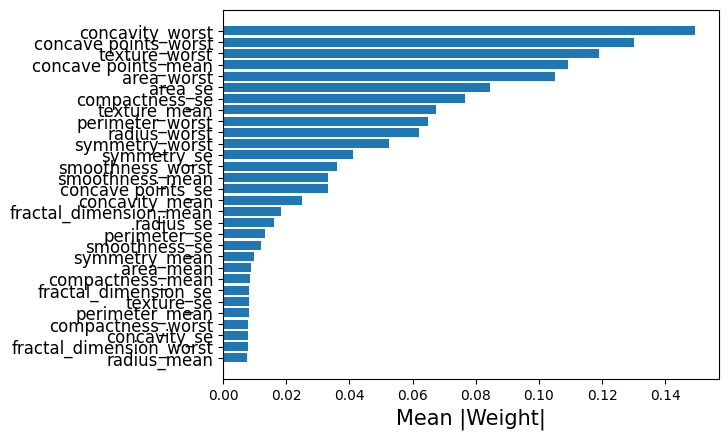

In [52]:
abs_mean = lime_weights.abs().mean(axis=0)
abs_mean = pd.DataFrame(data={'feature':abs_mean.index, 'abs_mean':abs_mean})
abs_mean = abs_mean.sort_values('abs_mean')

fig, ax = plt.subplots(nrows=1, ncols=1,)

y_ticks = range(len(abs_mean))
y_labels = abs_mean.feature

plt.barh(y=y_ticks, width=abs_mean.abs_mean,)
plt.yticks(ticks=y_ticks, labels=y_labels, size=12)
plt.xlabel('Mean |Weight|', size=15)

# Feature Trend

Text(0.5, 0, 'concavity_worst')

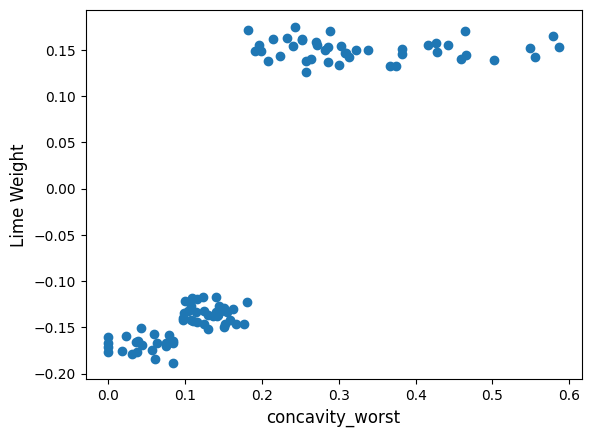

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1,)

feature_weigth = lime_weights['concavity_worst']
feature_value = x_train['concavity_worst'][0:100]

plt.scatter(x=feature_value, y=feature_weigth)

plt.ylabel('Lime Weight', size=12)
plt.xlabel('concavity_worst', size=12)